<a href="https://colab.research.google.com/github/Borwec/mmsp_25_26/blob/main/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.signal import tf2zpk
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Передатна функція в zpk-формі
Для заданої передатної функції $G(p)=\frac{3p^2 - p + 3}{2p^3 + 2}$ за варіантом 7 за допомогою функції *tf2zpk* були знайдені нулі, тобто корені чисельника, полюси, тобто корені знаменника, та коефіцієнт підсилення. Вони становлять:

$$ z_{1,2}≈0.167 \pm 0.986i $$
$$ p_1=-1, p_{2,3}≈0.5 \pm 0.866i $$
$$ k=1.5 $$

Таким чином, отримуємо передатнку функцію у zpk-формі:

$$ G(p)=1.5\bullet\frac{(p-0.167-0.986i)(p-0.167+0.986i)}{(p+1)(p-0.5-0.866i)(p-0.5+0.866i)} $$

Дійсні частини полюсів дорівнюють $-1$ та $0.5$ для $p_1$ та $p_2$ і $p_3$ відповідно. $0.5>0\implies$система є ***нестійкою***

# Аналіз стійкості замкненої системи
Маючи передатну функцію системи $G(p)=\frac{3p^2 - p + 3}{2p^3 + 2}$ та передатну функцію ланки зворотного зв'язку $ H(p)=k_u\frac{0.5}{p^2 + 2p} $ можемо провести аналіз стійкості замкненої системи з від'ємним зворотним зв'язком

Для оберненого зворотного зв'язку характеристичне рівняння замкненої системи має вигляд $ 1 + G(p)H(p) = 0 $
Знайдемо добуток $ G(p)H(p) $
$$ G(p)H(p) = \frac{3p^2 - p + 3}{2p^3 + 2} \bullet k_u\frac{0.5}{p^2 + 2p} = \frac{0.5k_u(3p^2 - p + 3)}{(2p^3 + 2)(p^2 + 2p)} $$
Нехай $ k_u = 1 $. Тоді $ 1 + G(p)H(p) = 0 $ при $ (2p^3 + 2)(p^2 + 2p) + 0.5(3p^2 - p + 3) = 0 $. Це рівняння спрощується до $ 2p^5 + 4p^4 + 3.5p^2 + 3.5p + 1.5 = 0 $. Можемо помітити, що у рівнянні відсутній член $ p^3 $, тобто коефіцієнт при $ p^3 $ дорівнює 0. За критерієм Рауса–Гурвіца така система не є стійкою. Варто також помітити, що значення $ k_u $ не впливає на коефіцієнт при $ p^3 $, а отже, така система не може бути стійкою. Тому подальші розрахунки проводитимуться для початкової системи

In [2]:
num = np.array([3, -1, 3])
den = np.array([2, 0, 0, 2])

z, p, k = tf2zpk(num, den)

In [3]:
print(f"z: {z}", f"p: {p}", f"k: {k}", sep="\n")
print(np.real(p))

z: [0.16666667+0.9860133j 0.16666667-0.9860133j]
p: [-1. +0.j         0.5+0.8660254j  0.5-0.8660254j]
k: 1.5
[-1.   0.5  0.5]


# Імпульсна характеристика

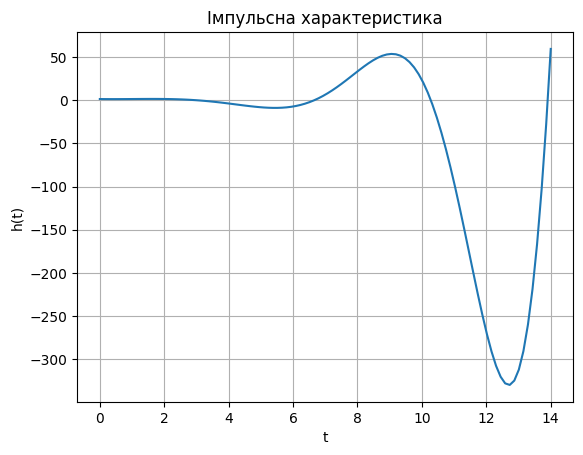

In [4]:
system = signal.TransferFunction(num, den)

t, h = signal.impulse(system)

plt.figure()
plt.plot(t, h)
plt.title("Імпульсна характеристика")
plt.xlabel("t")
plt.ylabel("h(t)")
plt.grid()
plt.show()

# Перехідна функція

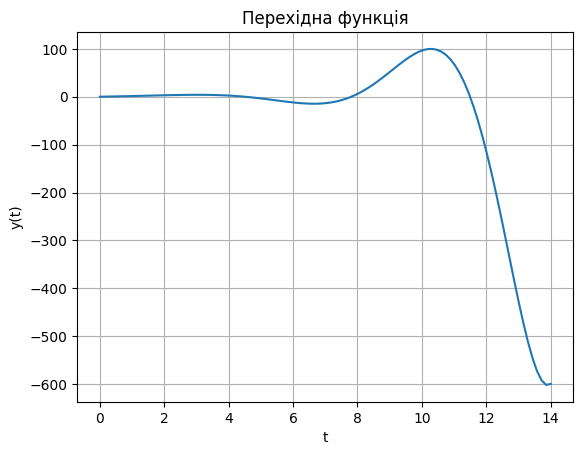

In [5]:
t, y = signal.step(system)

plt.figure()
plt.plot(t, y)
plt.title("Перехідна функція")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid()
plt.show()

# Реакція на гармонічний сигнал

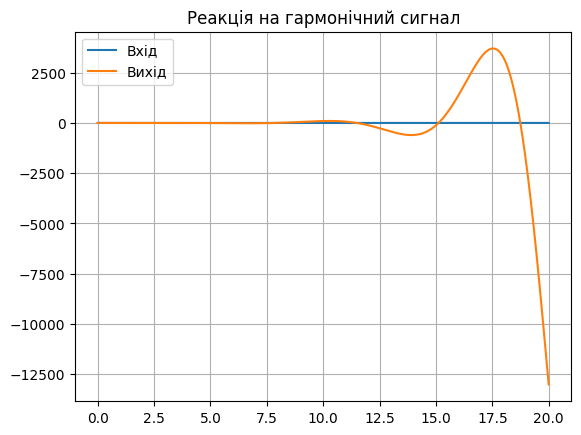

In [6]:
omega = 1.0
t = np.linspace(0, 20, 1000)
u = np.sin(omega * t)

t, y, _ = signal.lsim(system, u, t)

plt.figure()
plt.plot(t, u, label="Вхід")
plt.plot(t, y, label="Вихід")
plt.legend()
plt.title("Реакція на гармонічний сигнал")
plt.grid()
plt.show()

# Коефіцієнт підсилення та зсув фази

In [7]:
w, mag, phase = signal.bode(system, [omega])
print("Підсилення:", mag[0], "dB")
print("Фазовий зсув:", phase[0], "deg")

Підсилення: -9.030899869919436 dB
Фазовий зсув: -45.0 deg


# Годограф Найквіста

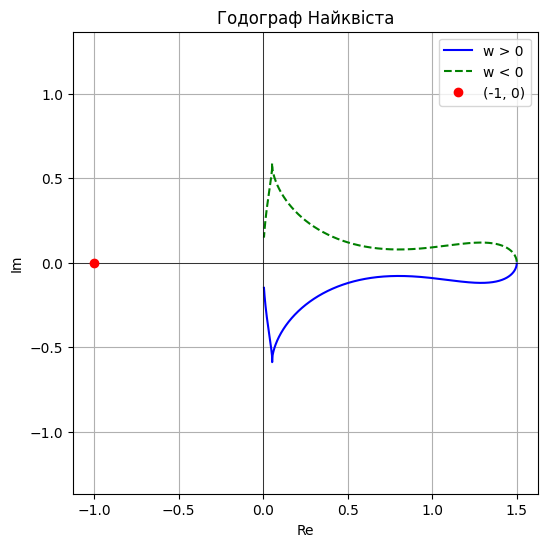

In [8]:
_, H = signal.freqresp(system)

plt.figure(figsize=(6, 6))
plt.plot(H.real, H.imag, "-b", label="w > 0")
plt.plot(H.real, -H.imag, "--g", label="w < 0")  # симетрія

plt.axhline(0, color="k", linewidth=0.5)
plt.axvline(0, color="k", linewidth=0.5)
plt.plot(-1, 0, "ro", label="(-1, 0)")

plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Годограф Найквіста")
plt.grid()
plt.legend()
plt.axis("equal")
plt.show()

# АЧХ та ФЧХ системи


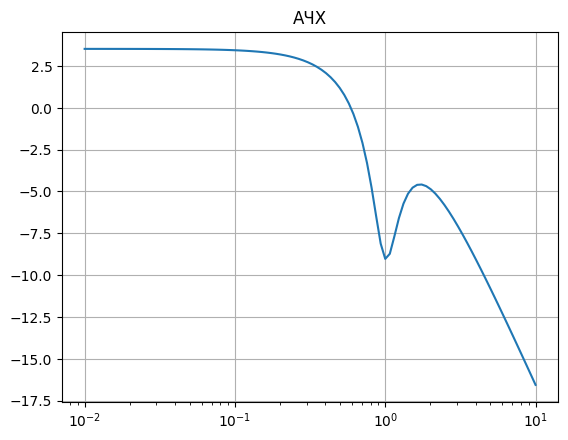

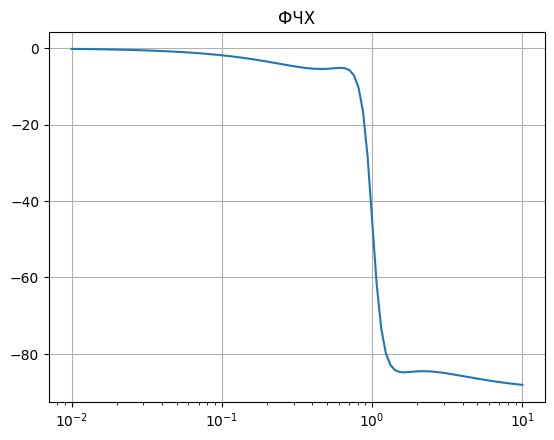

In [9]:
w, mag, phase = signal.bode(system)

plt.figure()
plt.semilogx(w, mag)
plt.title("АЧХ")
plt.grid()
plt.show()

plt.figure()
plt.semilogx(w, phase)
plt.title("ФЧХ")
plt.grid()
plt.show()

# Модель диференційного рівняння
Маємо диференційне рівняння виду

$$ \grave{x}(t) = \begin{bmatrix}
-2 & 0 & -2.75 & -3.75 & -0.75 & -1.75 & -1.75 & -0.75\\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{bmatrix}x(t) + \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}u(t) $$

$$ y(t) = \begin{bmatrix} 1.5 & 2.5 & 0.5 & 4.5 & 2.5 & 0.5 & 3 & 0 \end{bmatrix}x(t) $$

In [10]:
A, B, C, D = signal.tf2ss(num, den)

print("A =", A)
print("B =", B)
print("C =", C)
print("D =", D)

A = [[-0. -0. -1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
B = [[1.]
 [0.]
 [0.]]
C = [[ 1.5 -0.5  1.5]]
D = [[0.]]


# КФК та КФС
При порівнянні бачимо, що відображення вхід-вихід ідентичні початковій моделі системи

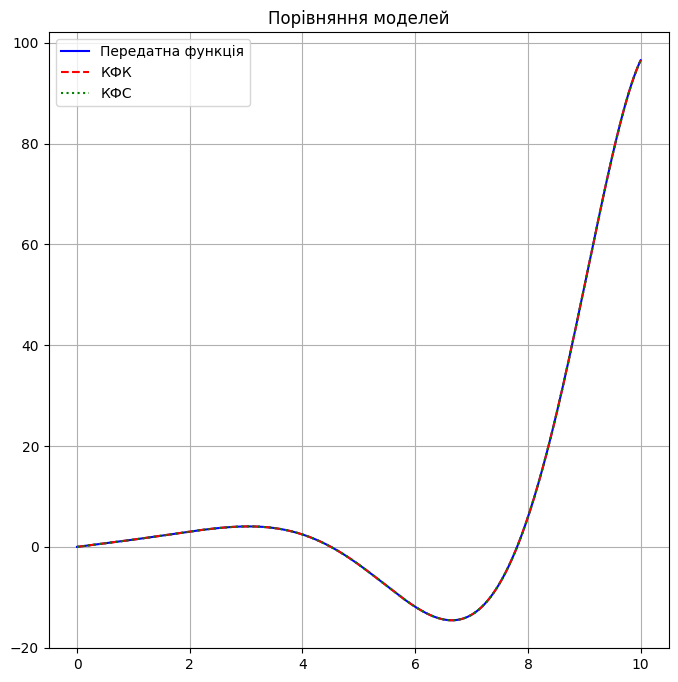

In [11]:
ss_control = signal.StateSpace(A, B, C, D)
ss_observe = signal.StateSpace(A.T, C.T, B.T, D)

t = np.linspace(0, 10, 1000)
t1, y1 = signal.step(system, T=t)
t2, y2 = signal.step(ss_control, T=t)
t3, y3 = signal.step(ss_observe, T=t)

plt.figure(figsize=(8, 8))
plt.plot(t1, y1, "-b", label="Передатна функція")
plt.plot(t2, y2, "--r", label="КФК")
plt.plot(t3, y3, ":g", label="КФС")
plt.legend()
plt.title("Порівняння моделей")
plt.grid()
plt.show()

# Матриці A, B і C для КФК

In [12]:
print("A =", A)
print("B =", B)
print("C =", C)

A = [[-0. -0. -1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
B = [[1.]
 [0.]
 [0.]]
C = [[ 1.5 -0.5  1.5]]


# Матриці A, B і C для КФС

In [13]:
print("A =", A.T)
print("B =", C.T)
print("C =", B.T)

A = [[-0.  1.  0.]
 [-0.  0.  1.]
 [-1.  0.  0.]]
B = [[ 1.5]
 [-0.5]
 [ 1.5]]
C = [[1. 0. 0.]]
